In [4]:
# default_exp audio.augmentations

# Audio Augmentations
> Augmentations for audio waveforms

In [5]:
#hide
from nbdev.export import notebook2script

In [6]:
#export
import matplotlib.pyplot as plt
import audiomentations as aug
from nnAudio import Spectrogram
from fastcore.all import *
from fastai.vision.augment import RandTransform
from fastai.vision.all import *
from dl_pipeline.audio.core import *

In [4]:
#export    
class AddGaussianSNR(Transform):
    "Add Gaussian Signal-to-noise ratio (SNR) noise"
    def __init__(self, sample_rate, min_SNR=0.001, max_SNR=1.0, p=0.5, **kwargs):
        store_attr('min_SNR'), store_attr('max_SNR'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.AddGaussianSNR(min_SNR=min_SNR, max_SNR=max_SNR, p=p),
                           sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))

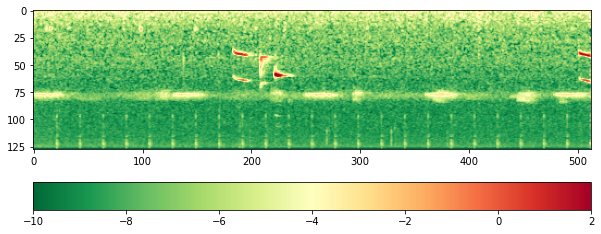

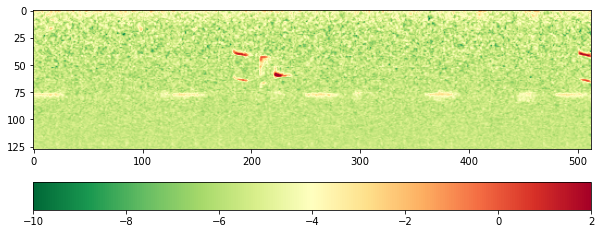

CPU times: user 1.16 s, sys: 29.7 ms, total: 1.19 s
Wall time: 763 ms


In [5]:
%%time
tfm = AddGaussianSNR(sample_rate=32000, min_SNR=0.99, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [6]:
#export
class ClippingDistortion(Transform):
    "Apply clipping distortion"
    def __init__(self, sample_rate, min_percentile_threshold=0,
                 max_percentile_threshold=40, p=0.5, **kwargs):
        store_attr('min_percentile_threshold'), store_attr('max_percentile_threshold')
        store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.ClippingDistortion(
            min_percentile_threshold=min_percentile_threshold, 
            max_percentile_threshold=max_percentile_threshold, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))

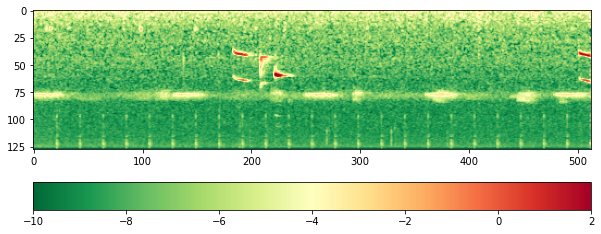

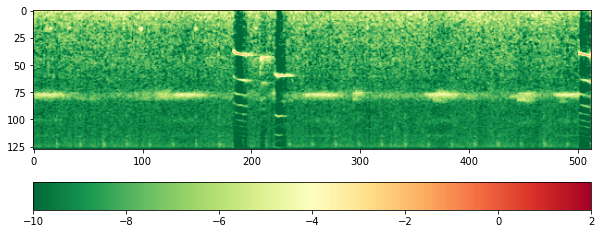

CPU times: user 1.15 s, sys: 19.7 ms, total: 1.17 s
Wall time: 731 ms


In [7]:
%%time
tfm = ClippingDistortion(sample_rate=32000, min_percentile_threshold=40, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [8]:
#export
class FrequencyMask(Transform):
    "Applies a frequency mask to a range of frequencies"
    def __init__(self, sample_rate,min_frequency_band=0.0, max_frequency_band=0.5,
                 p=0.5, **kwargs):
        store_attr('min_frequency_band'), store_attr('max_frequency_band'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.FrequencyMask(min_frequency_band=min_frequency_band, 
            max_frequency_band=max_frequency_band, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))
    

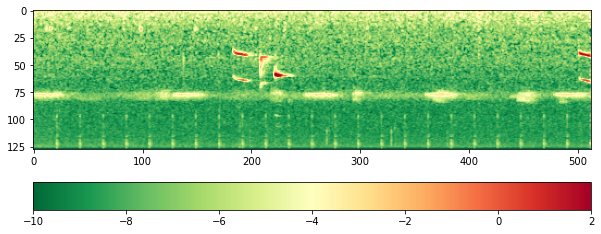

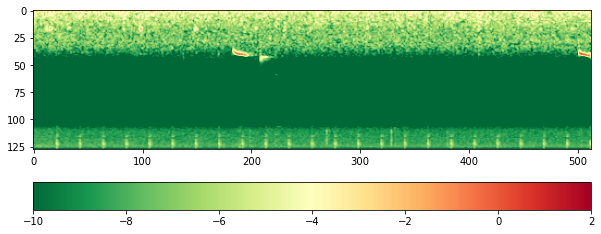

CPU times: user 1.11 s, sys: 15.4 ms, total: 1.12 s
Wall time: 722 ms


In [9]:
%%time
tfm = FrequencyMask(sample_rate=32000, min_frequency_band=0.5, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [10]:
#export
class TimeMask(Transform):
    "Applies a mask to a section of the audio clip"
    def __init__(self, sample_rate, min_band_part=0.0, max_band_part=0.5, p=0.5, **kwargs):
        store_attr('min_band_part'), store_attr('max_band_part'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.TimeMask(min_band_part=min_band_part, 
            max_band_part=max_band_part, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))

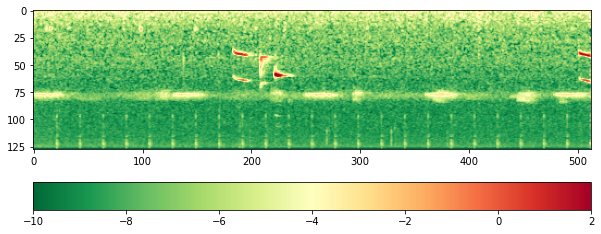

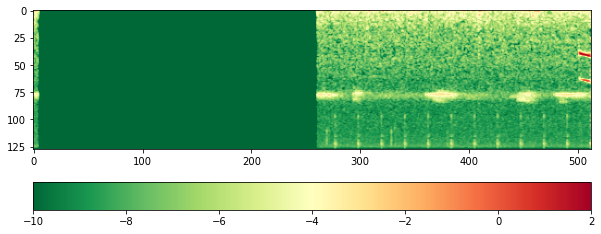

CPU times: user 1.13 s, sys: 1.16 ms, total: 1.13 s
Wall time: 724 ms


In [11]:
%%time
tfm = TimeMask(sample_rate=32000, min_band_part=0.5, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [12]:
#export
class Gain(Transform):
    "Apply a random gain between 'min_gain_in_db' and 'max_gain_in_db'"
    def __init__(self, sample_rate, min_gain_in_db=-12, max_gain_in_db=12, p=0.5, **kwargs):
        store_attr('min_gain_in_db'), store_attr('max_gain_in_db'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.Gain(min_gain_in_db=min_gain_in_db, 
            max_gain_in_db=max_gain_in_db, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))

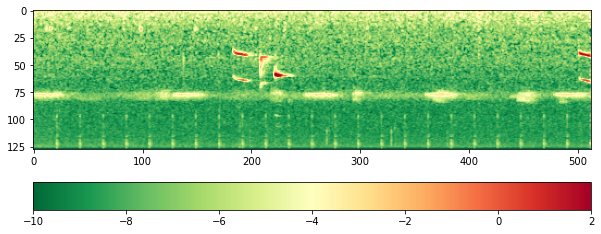

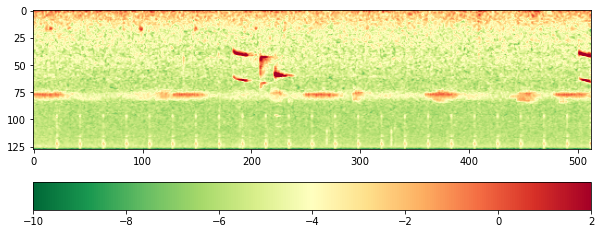

CPU times: user 1.08 s, sys: 36.5 ms, total: 1.11 s
Wall time: 714 ms


In [13]:
%%time
tfm = Gain(sample_rate=32000, min_gain_in_db=12, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [14]:
#export
class PitchShift(Transform):
    "Shift pitch by a random value of semitones between 'min_semitones' and 'max_semitones'"
    def __init__(self, sample_rate, min_semitones=-4, max_semitones=4, p=0.5, **kwargs):
        store_attr('min_semitones'), store_attr('max_semitones'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.PitchShift(min_semitones=min_semitones, 
            max_semitones=max_semitones, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))

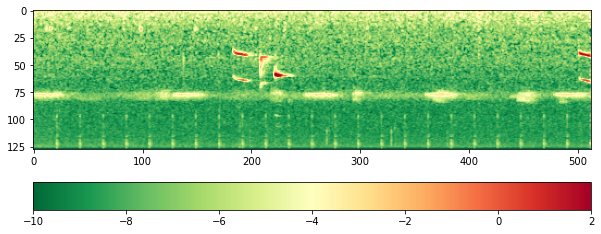

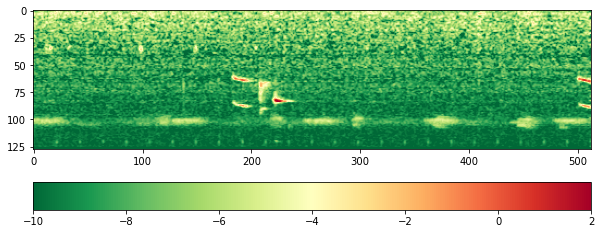

CPU times: user 1.91 s, sys: 23.7 ms, total: 1.94 s
Wall time: 1.52 s


In [15]:
%%time
tfm = PitchShift(sample_rate=32000, min_semitones=12, max_semitones=12, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [16]:
#export
class Shift(Transform):
    "Shift pitch by a random value of semitones between 'min_semitones' and 'max_semitones'"
    def __init__(self, sample_rate, min_fraction=-0.5, max_fraction=0.5, 
                 rollover=True, p=0.5, **kwargs):
        store_attr('min_fraction'), store_attr('max_fraction')
        store_attr('rollover'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.Shift(min_fraction=min_fraction, max_fraction=max_fraction, 
                                     rollover=rollover, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))
    

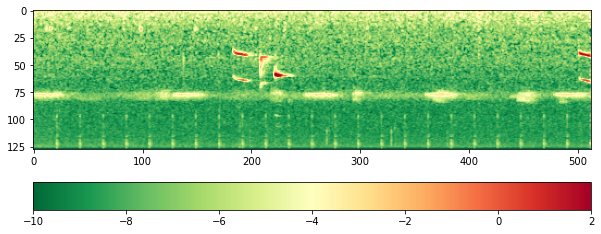

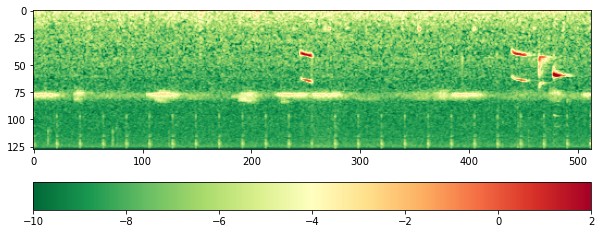

CPU times: user 1.18 s, sys: 24.7 ms, total: 1.21 s
Wall time: 783 ms


In [17]:
%%time
tfm = Shift(sample_rate=32000, min_fraction=0.5, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [18]:
#export
class TimeStretch(Transform):
    "Shift pitch by a random value of semitones between 'min_semitones' and 'max_semitones'"
    def __init__(self, sample_rate, min_rate=0.8, max_rate=1.25,
                 leave_length_unchanged=True, p=0.5, **kwargs):
        store_attr('min_rate'), store_attr('max_rate')
        store_attr('leave_length_unchanged'), store_attr('p')
        super().__init__(**kwargs)
        self.tfm = partial(aug.TimeStretch(min_rate=min_rate, max_rate=max_rate, 
            leave_length_unchanged=leave_length_unchanged, p=p), sample_rate=sample_rate)
    def encodes(self, wav:TensorAudio):
        return TensorAudio(self.tfm(wav.float().numpy()))

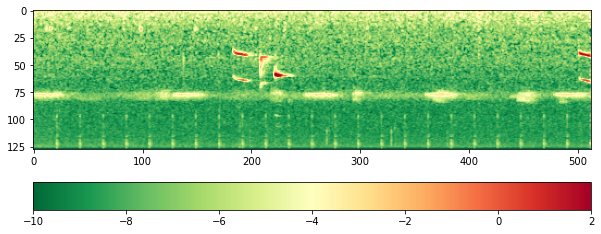

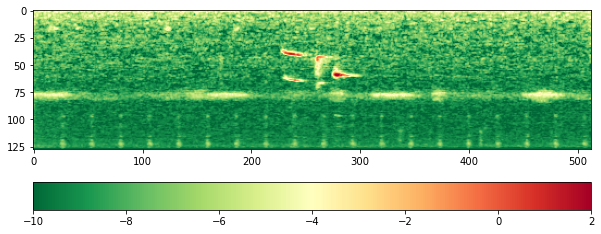

CPU times: user 1.17 s, sys: 19.9 ms, total: 1.19 s
Wall time: 794 ms


In [19]:
%%time
tfm = TimeStretch(sample_rate=32000, max_rate=0.8, p=1.0)
show_sample(sample_rate=32000)
show_sample(tfms=tfm, sample_rate=32000)

In [20]:
#export
class MelSpectrogram(Transform):
    "Shift pitch by a random value of semitones between 'min_semitones' and 'max_semitones'"
    def __init__(self, sample_rate, n_mels=128, hop_length=512, eps=1e-6, 
                 normalize_spectro=True, device=torch.device("cuda:0"), **kwargs):
        store_attr('sample_rate'), store_attr('n_mels'), store_attr('hop_length')
        store_attr('eps')
        super().__init__(**kwargs)
        self.spectro = Spectrogram.MelSpectrogram(
            sr=sample_rate, n_mels=n_mels, hop_length=hop_length, 
            verbose=False, **kwargs).to(device)
        self.relu = nn.ReLU(inplace=True)
        self.normalize_spectro = normalize_spectro
        self.eps = eps
        self.device = device
        
    def encodes(self, x:TensorAudio):
        with torch.no_grad():
            d = x.device
            x = x.to(self.device)
            x = self.relu(self.spectro(x)).unsqueeze(1)
            x = x.add(self.eps).log()
            if self.normalize_spectro:
                x = (x - x.mean((2,3))[...,None,None])/x.std((2,3))[...,None,None]
            assert np.sum(np.isnan(x.detach().cpu().numpy())) == 0
            return TensorImage(x.to(d))

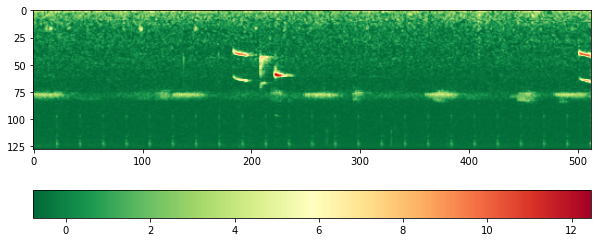

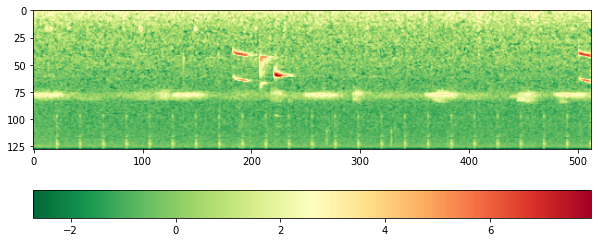

CPU times: user 2.24 s, sys: 349 ms, total: 2.59 s
Wall time: 2.26 s


In [21]:
%%time
tfm = MelSpectrogram(32000, eps=1e-3)
x = load_npy(sample_file())[:512*512]
plt.figure(figsize=(10,5))
plt.imshow(tfm(x).squeeze(), cmap='RdYlGn_r')
plt.colorbar(orientation='horizontal')
plt.show()

tfm = MelSpectrogram(32000, eps=1e-6)
x = load_npy(sample_file())[:512*512]
plt.figure(figsize=(10,5))
plt.imshow(tfm(x).squeeze(), cmap='RdYlGn_r')
plt.colorbar(orientation='horizontal')
plt.show()

In [22]:
#hide 
notebook2script()

Converted 00_core.ipynb.
Converted 01audio_augmentations.ipynb.
Converted 01audio_core.ipynb.
Converted 01audio_dataset.ipynb.
Converted 01audio_models.ipynb.
Converted 01audio_util.ipynb.
Converted index.ipynb.
Converted kaggle_rfcx-species-audio-detection.ipynb.
